Exactitude du modèle: 0.5


ValueError: X.shape[1] = 2 should be equal to 3, the number of features at training time

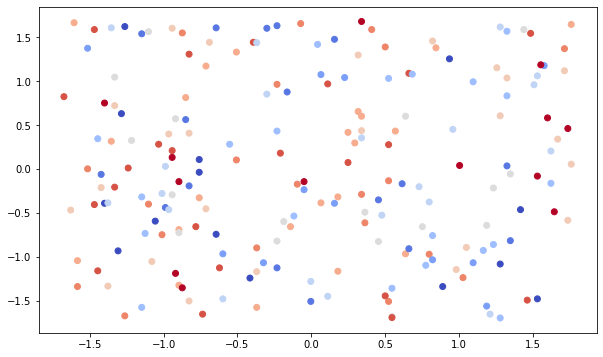

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Charger les données
data = pd.read_csv("student_admission_dataset.csv")

# Diviser les données en caractéristiques et cibles
X = data.drop("Admission_Status", axis=1)
y = data["Extracurricular_Activities"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des fonctionnalités
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du classifieur SVM avec un noyau polynomial
clf = SVC(kernel='poly', degree=3, C=1.0)
clf.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = clf.predict(X_test_scaled)

# Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle:", accuracy)

# Traçage de la frontière de décision (pour deux fonctionnalités)
# Remarque: vous pouvez choisir deux fonctionnalités pour le traçage
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm)

# Traçage de la frontière de décision
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 10),
                     np.linspace(ylim[0], ylim[1], 10))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM (noyau polynomial) avec Modèle d\'Entraînement')
plt.show()